# Simulation input modelling

**In this lab you will:**

* Gain practical knowledge in pre-processing and analysing real world stochastic health system data
* Learn how to fit distribution to data
* Learn how to select a suitable distribution for your data


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **Exercise 1**: stroke ward admissions and early supported discharge

The dataset we will work with represents admissions and discharges at a hospital acute stroke ward.  

The dataset contains the following fields

* **patient_type**: stroke, tia (minor stroke), complex-neurological (e.g. brain injury) and other (i.e. non-neurological patients)
* **acute_admission**: date dd/mm/yyyy of arrival
* **asu_discharge**: date dd/mm/yyyy of discharge
* **esd**: Early supported discharge binary 0/1. 1 == patient underwent ESD

**In this exercise you will need to:**
* Preprocess and wrangle the data set
* Perform some exploratory analysis
* Fit one or more distributions to decide how to model the arrival process
* Fit one or more distributions to decide how to model length stay on the ward.

### Reading in the data

In [276]:
acute_strokes = pd.read_csv('../../../../input_modelling_data/input_model_asu.csv')

In [277]:
acute_strokes.shape

(2279, 5)

In [278]:
acute_strokes.head()

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd
0,0,Stroke,01/01/2010,24/01/2010,0
1,1,Stroke,02/01/2010,13/01/2010,0
2,2,Stroke,02/01/2010,08/01/2010,0
3,3,Complex-neurological,02/01/2010,03/01/2010,0
4,4,Other,04/01/2010,04/01/2010,0


In [279]:
#any missing data?
acute_strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2279 non-null   int64 
 1   patient_type   2279 non-null   object
 2   asu_admit      2279 non-null   object
 3   asu_discharge  2279 non-null   object
 4   esd            2279 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 89.1+ KB


### Exercise 1.1: reformat the date fields

The date fields as-is are not suitable for analysis in python. Before we can do any analysis we need to pre-process the dates.

**Task**:

* Convert `acute_admit` and `asu_discharge` into valid date fields: format = YYYY-MM-DD

**Hints**

* Take a look at the `pd.to_datetime()` function
* The dates are in UK format.  You will need to look at what options `pandas` provides to handle it.

In [280]:
# your code here ...

In [281]:
#example answer
acute_strokes['asu_admit'] = pd.to_datetime(acute_strokes['asu_admit'], 
                                                dayfirst=True)
acute_strokes['asu_discharge'] = pd.to_datetime(acute_strokes['asu_discharge'],
                                                dayfirst=True)

In [282]:
acute_strokes.head()

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd
0,0,Stroke,2010-01-01,2010-01-24,0
1,1,Stroke,2010-01-02,2010-01-13,0
2,2,Stroke,2010-01-02,2010-01-08,0
3,3,Complex-neurological,2010-01-02,2010-01-03,0
4,4,Other,2010-01-04,2010-01-04,0


In [283]:
acute_strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     2279 non-null   int64         
 1   patient_type   2279 non-null   object        
 2   asu_admit      2279 non-null   datetime64[ns]
 3   asu_discharge  2279 non-null   datetime64[ns]
 4   esd            2279 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 89.1+ KB


### **Exercise 1.2** Sort the admissions by date

**Task**:
* Put the data into ascending order sorted by`asu_admit` 

**Hints**:
* Take a look at `pd.DataFrame.sort_values(by)`
* Make sure you take a look at what `sort_values` does and what it returns

In [284]:
#your code here ...

In [285]:
#example answer
acute_strokes = acute_strokes.sort_values(by='asu_admit')
acute_strokes.head()

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd
0,0,Stroke,2010-01-01,2010-01-24,0
1,1,Stroke,2010-01-02,2010-01-13,0
2,2,Stroke,2010-01-02,2010-01-08,0
3,3,Complex-neurological,2010-01-02,2010-01-03,0
4,4,Other,2010-01-04,2010-01-04,0


### **Exercise 1.3** Recoding the `patient_type` field

It is not strictly necessary, but its often useful to get recode fields of type **str** to an **int**

Let's take a look at the unique codings we have for patient_type:

In [286]:
acute_strokes.patient_type.unique()

array(['Stroke', 'Complex-neurological', 'Other', 'TIA'], dtype=object)

So we have four types of basic classification.  Let's recode them as follows:
* Stroke: 0
* Complex-neurological: 1
* Other: 2
* TIA: 3

**Task:**

* Either recode or create a new field that encodes the type of patient as above. The output of your preprocessing will be a numeric field.
* Confirm your recoding has worked (you can always reload the data an preprocess again if needed!)

**Hints:**

* There are multiple ways to complete this exercise.  One option is to make use of `pd.DataFrame.replace()` method.  For that you will need to create a dict that maps a str to an int e.g.

```python
example_mapping = {'foo':0,
                   'bar':1,
                   'spam':2}

example_df.replace(example_mapping)
```

In [287]:
# your code here ...

In [288]:
#example answer ..
#we will store the recoding in a 
recoded_patient_type = {'Stroke':0, 
                        'Complex-neurological':1, 
                        'TIA':2, 
                        'Other':3}

In [289]:
acute_strokes = acute_strokes.replace(recoded_patient_type)

In [290]:
acute_strokes.head()

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd
0,0,0,2010-01-01,2010-01-24,0
1,1,0,2010-01-02,2010-01-13,0
2,2,0,2010-01-02,2010-01-08,0
3,3,1,2010-01-02,2010-01-03,0
4,4,3,2010-01-04,2010-01-04,0


### **Exercise 1.4** Explore the interarrival distributions

A first task in input modelling is often to explore the interarrival distributions.  This is often a major source of variability in stochastic health systems.

**Task:**

* Using your **pre-sorted** data calculate the days between arrivals.  We will ignore patient types for the moment.
* Plot a histogram of interarrival times
* Calculate the mean and stdev of the interarrival times
* What might be a reasonable distribution?

**Hints**:

* Checkout the `pd.DataFrame.diff()` method
* If a field is a valid datetime then you can access days, months, years as follows:

```python

#for days
example_df['my_date_field'].dt.days

#months
example_df['my_date_field'].dt.months

#years
example_df['my_date_field'].dt.years

```

In [291]:
#your code here ...

In [292]:
#example answer ...
inter_arrivals = acute_strokes['asu_admit'].diff().dt.days
inter_arrivals.head()

0    NaN
1    1.0
2    0.0
3    0.0
4    2.0
Name: asu_admit, dtype: float64

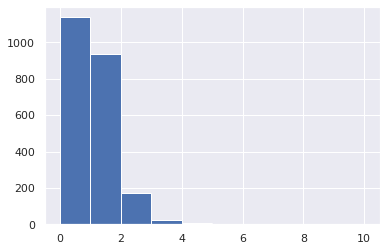

In [293]:
inter_arrivals.hist(bins=10)

In [294]:
inter_arrivals.mean()

0.6167690956979807

In [295]:
inter_arrivals.std()

0.7655400499591828

### **Exercise 1.5** Subgroup interarrival distributions.

We know that there are at least four categories of patients that use the system.  Let's explore if the distributions vary by group.

**Task:**
* For each sub group (stroke, complex, tia and other)
    * summarise the subgroup sample size
    * calculate the subgroups interarrival days (i.e. the days between consecutive stroke arrivals)
    * plot the distribution as a histogram
    * calculate the mean and standard dev
    
* Without doing a formal statistical test, what distributions do you think would be useful?

**Hints:**

* You can plot each of histograms seperately.  But if you wanted to plot histograms in a grid remember `Matplotlib` has `fig, ax = plot.subplots(nrows, ncols)` where `ax` is a numpy matrix and each element represents the corresponding axis of a chart in the grid.

In [296]:
# your code here ...

In [301]:
#exmple answer ...
iat_by_group = {}

for patient_type in range(4):
    #calculate individual iat
    data = acute_strokes.loc[acute_strokes['patient_type'] \
            == patient_type]['asu_admit'].diff().dt.days

    #print mean
    print(f'{patient_type}: n:{data.shape[0]}, m:{data.dropna().mean():.2f}, s:{data.dropna().std():.2f}')
    
    #store by group
    iat_by_group[f'{patient_type}'] = data


0: n:1253, m:1.12, s:1.18
1: n:410, m:3.41, s:3.92
2: n:157, m:8.64, s:10.70
3: n:459, m:3.04, s:4.34


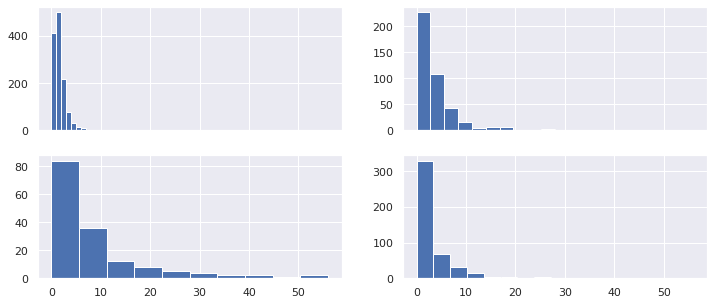

In [302]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True)

key = 0
for row in range(2):
    for col in range(2):
        #plot histogram dropping initial NAN to avoid matplotlib warning/moaning
        ax[row][col].hist(iat[f'{key}'].dropna())
        key += 1

In [306]:
#if yuo wanted to store subgroup means
means = [items.dropna().to_numpy().mean() for group, items in iat.items()]
means

[1.1222044728434504, 3.41320293398533, 8.64102564102564, 3.0436681222707422]

In [307]:
#and subgroup std
stds = [items.dropna().to_numpy().std() for group, items in iat.items()]
stds

[1.1830481004722977, 3.9107302403269304, 10.663830984020368, 4.335072423896152]

### **Exercise 1.6** Are stroke patients that undergo ESD different from those that don't?

Let's explore if Early Supported Discharge patients have a different arrival process to non-ESD patients

**Task:**

* Using the field 'esd' split the **stroke** patients into two groups:  ESD stroke patients and non-ESD patients.
* Plot the distributions
* Calculate the mean and standard deviation of each subgroup.
* You should find that the mean and stdev are roughly the same for each group.  
    * What distribution does this suggest is a good choice and what is special about this distribution that means you don't need to model it as two seperate arrival processes?
    * What percentage of stroke arrivals go on to have ESD?  How might you model that?

In [329]:
inter_arrivals_esd = acute_strokes.loc[(acute_strokes['esd'] == 1) & (acute_strokes['patient_type'] == 0)]['asu_admit'].diff().dt.days
inter_arrivals_esd.shape

(278,)

In [330]:
inter_arrivals_no_esd = acute_strokes.loc[(acute_strokes['esd'] == 0) & (acute_strokes['patient_type'] == 0)]['asu_admit'].diff().dt.days
inter_arrivals_no_esd.shape

(975,)

In [333]:
#check we are not missing any strokes. should = 1253
inter_arrivals_esd.shape[0] + inter_arrivals_no_esd.shape[0]

1253

In [350]:
inter_arrivals_esd.shape[0] / (inter_arrivals_esd.shape[0] + inter_arrivals_no_esd.shape[0])

0.22186751795690343

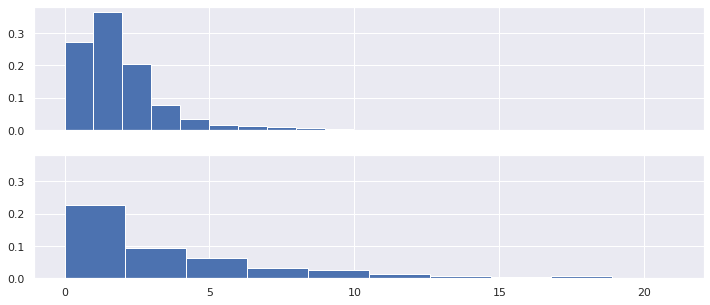

In [346]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharey=True, sharex=True)

ax[0].hist(inter_arrivals_no_esd.dropna(), density=True);
ax[1].hist(inter_arrivals_esd.dropna(), density=True);

In [347]:
inter_arrivals_esd.describe()

count    277.000000
mean       3.916968
std        4.012250
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       21.000000
Name: asu_admit, dtype: float64

In [348]:
inter_arrivals_no_esd.describe()

count    974.000000
mean       1.442505
std        1.532881
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: asu_admit, dtype: float64

### **Exercise 1.7**: length of stay in the acute ward

To estimate distributions of length of stay we need to calculate the difference in days between admission and discharge.

**Task:**

* Create a new field called `los` that is equal the patients length of stay in the ward in days.
* Explore the distribution of LoS by patient_type subgroup.

**Hints:**

* Remember to look at ESD versus non-ESD stroke patients

In [352]:
acute_strokes.head()

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd
0,0,0,2010-01-01,2010-01-24,0
1,1,0,2010-01-02,2010-01-13,0
2,2,0,2010-01-02,2010-01-08,0
3,3,1,2010-01-02,2010-01-03,0
4,4,3,2010-01-04,2010-01-04,0


In [357]:
acute_strokes['los'] = (acute_strokes.asu_discharge - acute_strokes.asu_admit).dt.days

In [368]:
acute_strokes.loc[acute_strokes['los'] == 0]

,Unnamed: 0,patient_type,asu_admit,asu_discharge,esd,los
4,4,3,2010-01-04,2010-01-04,0,0
53,53,3,2010-02-08,2010-02-08,0,0
75,75,3,2010-02-19,2010-02-19,0,0
80,80,1,2010-02-22,2010-02-22,0,0
89,89,1,2010-02-27,2010-02-27,0,0
...,...,...,...,...,...,...
2232,2232,1,2013-09-24,2013-09-24,0,0
2244,2244,2,2013-10-03,2013-10-03,0,0
2246,2246,2,2013-10-04,2013-10-04,0,0
2255,2255,2,2013-10-10,2013-10-10,0,0


In [362]:
#exmple answer ...
los_by_group = {}

for patient_type in range(4):
    #calculate individual los
    data = acute_strokes.loc[acute_strokes['patient_type'] \
            == patient_type]['los']

    #print mean
    print(f'{patient_type}: n:{data.shape[0]}, m:{data.dropna().mean():.2f}, s:{data.dropna().std():.2f}')
    
    #store by group
    los_by_group[f'{patient_type}'] = data


0: n:1253, m:6.76, s:8.03
1: n:410, m:3.93, s:5.06
2: n:157, m:1.69, s:2.34
3: n:459, m:3.67, s:5.27


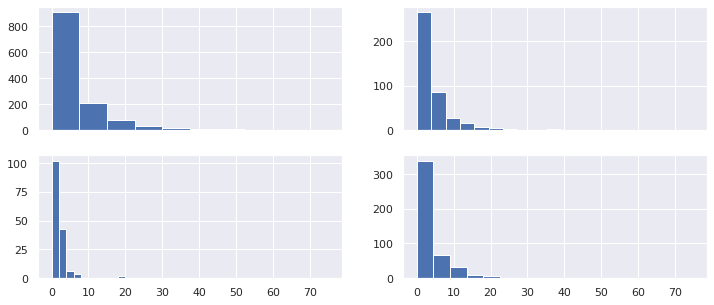

In [363]:
#plot histograms on grid
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True)

key = 0
for row in range(2):
    for col in range(2):
        #plot histogram dropping initial NAN to avoid matplotlib warning/moaning
        ax[row][col].hist(los_by_group[f'{key}'].dropna())
        key += 1